# RainfallQC demo

## Index
- [1. Load in GDSR data](#1-load-in-gdsr-data)  
- [2. Quality control checks](#2-quality-control-checks)  
[2.1 Gauge checks](#21-gauge-checks)  
[2.2 Comparison checks](#22-comparison-checks)  
[2.3 Time-series checks](#23-time-series-checks)  
[2.4 Neighbourhood checks](#24-neighbourhood-checks)  
- [3 Running QC frameworks](#3-running-qc-frameworks)

In [1]:
import polars as pl
import rainfallqc

print(rainfallqc.__version__)

0.3.0


In [2]:
from rainfallqc import (comparison_checks, gauge_checks, neighbourhood_checks,
                        timeseries_checks)
from rainfallqc.utils import data_readers # Reads data from GDSR and GPCC format
from rainfallqc.qc_frameworks import apply_qc_framework # applies QC framework like IntenseQC

from load_example_data import load_local_GSDR_data, load_local_GSDR_metadata # Reads info for a single gauge

# 1. Load in GSDR data
[Back to Index](#index)

The data we will use in this example is from the Global sub-daily rainfall [dataset](https://journals.ametsoc.org/view/journals/clim/32/15/jcli-d-18-0143.1.xml)

## 1.1 Load data for a single rain gauge

In [3]:
TARGET_GSDR = "DE_02483"
TARGET_GAUGE_COL = f"rain_mm_{TARGET_GSDR}"

In [4]:
gsdr_data = load_local_GSDR_data(gauge_id=TARGET_GSDR)
gsdr_metadata = load_local_GSDR_metadata(gauge_id=TARGET_GSDR)

In [5]:
gsdr_data

time,rain_mm_DE_02483
datetime[μs],f64
2006-01-01 00:00:00,0.9
2006-01-01 01:00:00,0.3
2006-01-01 02:00:00,0.3
2006-01-01 03:00:00,0.0
2006-01-01 04:00:00,0.0
…,…
2010-12-31 19:00:00,0.0
2010-12-31 20:00:00,0.0
2010-12-31 21:00:00,0.0


## 1.2 Load data for a subset of the GSDR network

In [6]:
gdsr_reader = data_readers.GSDRNetworkReader(path_to_gsdr_dir="../../data/GSDR/")

In [7]:
gdsr_reader.metadata.head()

station_id,country,original_station_number,original_station_name,path_to_original_data,latitude,longitude,start_datetime,end_datetime,elevation,number_of_records,percent_missing_data,original_timestep,new_timestep,original_units,new_units,time_zone,daylight_saving_info,no_data_value,resolution,other,path
str,str,str,str,str,f64,f64,datetime[μs],datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,str
"""DE_00310""","""Germany""","""00310""","""NA""","""B:/INTENSE data/Original data/…",51.0662,8.5373,2006-01-01 00:00:00,2010-12-31 23:00:00,"""590m""","""43824""","""0.00""","""1hr""","""1hr""","""mm""","""mm""","""CET""","""NA""","""-999""","""0.10""","""""","""../../data/GSDR/DE_00310.txt"""
"""DE_00389""","""Germany""","""00389""","""NA""","""B:/INTENSE data/Original data/…",51.0148,8.4318,2009-11-01 00:00:00,2010-12-31 23:00:00,"""436m""","""10224""","""0.00""","""1hr""","""1hr""","""mm""","""mm""","""CET""","""NA""","""-999""","""0.10""","""""","""../../data/GSDR/DE_00389.txt"""
"""DE_00390""","""Germany""","""00390""","""NA""","""B:/INTENSE data/Original data/…",50.9837,8.3679,2006-01-01 00:00:00,2010-12-31 23:00:00,"""610m""","""43824""","""0.00""","""1hr""","""1hr""","""mm""","""mm""","""CET""","""NA""","""-999""","""0.10""","""""","""../../data/GSDR/DE_00390.txt"""
"""DE_01300""","""Germany""","""01300""","""NA""","""B:/INTENSE data/Original data/…",51.254,8.1565,2006-01-01 00:00:00,2010-12-31 23:00:00,"""351m""","""43824""","""0.00""","""1hr""","""1hr""","""mm""","""mm""","""CET""","""NA""","""-999""","""0.10""","""""","""../../data/GSDR/DE_01300.txt"""
"""DE_02483""","""Germany""","""02483""","""NA""","""B:/INTENSE data/Original data/…",51.1803,8.4891,2006-01-01 00:00:00,2010-12-31 23:00:00,"""839m""","""43824""","""0.00""","""1hr""","""1hr""","""mm""","""mm""","""CET""","""NA""","""-999""","""0.10""","""""","""../../data/GSDR/DE_02483.txt"""


#### 1.2.1 Get nearest neighbours

In [8]:
## Get nearest 8 neighbours with temporal overlap of 1000 days
nearest_gdsr_gauges = gdsr_reader.get_nearest_overlapping_neighbours_to_target(
    target_id=TARGET_GSDR, distance_threshold=100, n_closest=8, min_overlap_days=1000
)
nearest_gdsr_paths = [gdsr_reader.data_paths[gauge_id] for gauge_id in nearest_gdsr_gauges]
nearest_gdsr_paths

['../../data/GSDR/DE_02718.txt',
 '../../data/GSDR/DE_04488.txt',
 '../../data/GSDR/DE_00310.txt',
 '../../data/GSDR/DE_06303.txt',
 '../../data/GSDR/DE_01300.txt',
 '../../data/GSDR/DE_03215.txt',
 '../../data/GSDR/DE_00390.txt']

In [9]:

gdsr_network_data = gdsr_reader.load_network_data(
    data_paths=nearest_gdsr_paths, rain_col_prefix='rain'
)
gdsr_network_data = gdsr_network_data.sort("time")

gdsr_network_data = gsdr_data.join(gdsr_network_data, on='time') # Join target data
gdsr_network_data.head()

time,rain_mm_DE_02483,rain_mm_DE_02718,rain_mm_DE_04488,rain_mm_DE_00310,rain_mm_DE_06303,rain_mm_DE_01300,rain_mm_DE_03215,rain_mm_DE_00390
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64
2006-01-01 00:00:00,0.9,0.1,null,0.0,0.0,0.1,null,0.0
2006-01-01 01:00:00,0.3,0.6,null,0.2,0.2,0.0,null,0.2
2006-01-01 02:00:00,0.3,0.1,null,0.0,0.0,0.0,null,0.0
2006-01-01 03:00:00,0.0,0.0,null,0.0,0.0,0.0,null,0.0
2006-01-01 04:00:00,0.0,0.0,null,0.1,0.0,0.0,null,0.0


# 2. Quality control checks
Four distinct types included in RainfallQC Python package

<img src="images/rainfall_qc_quadrant.png" alt="qc" width="800"/>
<!-- *Figure 1. Types of rainfall QC* -->


# 2.1 Gauge checks
[Back to Index](#index)  
QC1-QC7 (suspect gauges)

<img src="images/gauge_example.jpg" alt="gauge" width="250"/>

**Description:** - For detecting abnormalities in summary and descriptive statistics.

##### QC1

In [10]:
gauge_checks.check_years_where_annual_mean_k_top_rows_are_zero(
    gsdr_data, target_gauge_col=TARGET_GAUGE_COL, k=1800
)

[2006, 2008, 2009]

##### QC2

In [11]:
gauge_checks.check_years_where_nth_percentile_is_zero(gsdr_data, target_gauge_col=TARGET_GAUGE_COL, quantile=0.8)

[2006, 2008, 2009]

##### QC3

In [12]:
gauge_checks.check_breakpoints(gsdr_data, target_gauge_col=TARGET_GAUGE_COL)

0

##### QC4

In [13]:
gauge_checks.check_intermittency(gsdr_data, target_gauge_col=TARGET_GAUGE_COL)

[2010, 2006]

##### QC5

In [14]:
gauge_checks.check_min_val_change(gsdr_data, target_gauge_col=TARGET_GAUGE_COL, expected_min_val=0.1)

[2006, 2010]

##### QC6-7

In [15]:
gauge_checks.check_temporal_bias(gsdr_data, target_gauge_col=TARGET_GAUGE_COL, time_granularity="weekday")

0

# 2.2 Comparison checks
[Back to Index](#index)  
QC8-QC11 (suspiciously high values) - comparison to ETCCDI  

<img src="images/timeseries_comparison_example.png" alt="comparison-check" width="450"/>

**Description:** - For detecting abnormalities based on benchmarks.



##### QC8

In [16]:
comparison_checks.check_annual_exceedance_etccdi_prcptot(
    gsdr_data,
    target_gauge_col=TARGET_GAUGE_COL,
    gauge_lat=gsdr_metadata["latitude"],
    gauge_lon=gsdr_metadata["longitude"],
)

[0, 0, 0, 0, 0]

##### QC9

In [17]:
comparison_checks.check_annual_exceedance_etccdi_r99p(
    gsdr_data,
    TARGET_GAUGE_COL,
    gauge_lat=gsdr_metadata["latitude"],
    gauge_lon=gsdr_metadata["longitude"],
)

[0, 4, 0, 0, 0]

##### QC10

In [18]:
wr_check = comparison_checks.check_exceedance_of_rainfall_world_record(
    gsdr_data, TARGET_GAUGE_COL, time_res="hourly"
)
wr_check["world_record_check"].value_counts()

world_record_check,count
f64,u32
1.0,23
0.0,42750
NaN,1046
4.0,5


In [19]:
gsdr_data

time,rain_mm_DE_02483
datetime[μs],f64
2006-01-01 00:00:00,0.9
2006-01-01 01:00:00,0.3
2006-01-01 02:00:00,0.3
2006-01-01 03:00:00,0.0
2006-01-01 04:00:00,0.0
…,…
2010-12-31 19:00:00,0.0
2010-12-31 20:00:00,0.0
2010-12-31 21:00:00,0.0


In [20]:
wr_check = gsdr_data.join(wr_check, on='time')

In [21]:
wr_check.filter(pl.col("world_record_check") == 1)

time,rain_mm_DE_02483,world_record_check
datetime[μs],f64,f64
2006-12-24 01:00:00,450.0,1.0
2006-12-24 02:00:00,450.0,1.0
2006-12-24 03:00:00,450.0,1.0
2006-12-24 04:00:00,450.0,1.0
2006-12-24 05:00:00,450.0,1.0
…,…,…
2006-12-24 19:00:00,450.0,1.0
2006-12-24 20:00:00,450.0,1.0
2006-12-24 21:00:00,450.0,1.0


In [22]:
wr_check.filter(pl.col("world_record_check") == 4)

time,rain_mm_DE_02483,world_record_check
datetime[μs],f64,f64
2007-04-23 00:00:00,999.0,4.0
2007-04-23 01:00:00,999.0,4.0
2007-04-23 02:00:00,999.0,4.0
2007-04-23 03:00:00,999.0,4.0
2007-04-23 04:00:00,999.0,4.0


##### QC11

In [23]:
rx1day_check = comparison_checks.check_hourly_exceedance_etccdi_rx1day(
    gsdr_data,
    TARGET_GAUGE_COL,
    gauge_lat=gsdr_metadata["latitude"],
    gauge_lon=gsdr_metadata["longitude"],
)

rx1day_check["rx1day_check"].value_counts()

rx1day_check,count
f64,u32
4.0,32
0.0,42740
1.0,6
NaN,1046


In [24]:
rx1day_check = gsdr_data.join(rx1day_check, on='time')

In [25]:
rx1day_check.filter(pl.col("rx1day_check") == 1)

time,rain_mm_DE_02483,rx1day_check
datetime[μs],f64,f64
2008-05-30 19:00:00,50.0,1.0
2008-05-30 20:00:00,50.0,1.0
2008-05-30 21:00:00,50.0,1.0
2008-06-30 00:00:00,50.0,1.0
2008-06-30 01:00:00,50.0,1.0
2010-08-10 23:00:00,50.0,1.0


In [26]:
rx1day_check.filter(pl.col("rx1day_check") == 4)

time,rain_mm_DE_02483,rx1day_check
datetime[μs],f64,f64
2006-12-24 01:00:00,450.0,4.0
2006-12-24 02:00:00,450.0,4.0
2006-12-24 03:00:00,450.0,4.0
2006-12-24 04:00:00,450.0,4.0
2006-12-24 05:00:00,450.0,4.0
…,…,…
2007-04-23 02:00:00,999.0,4.0
2007-04-23 03:00:00,999.0,4.0
2007-04-23 04:00:00,999.0,4.0


# 2.3 Time-series checks
[Back to Index](#index)  
QC12-QC15 (Long periods without rainfall, accumulations and streaks)
- will also include spike checks and other time-series related QC

<img src="images/timeseries_example.jpg" alt="timeseries" width="350"/>

**Description:** - For detecting abnormalities in patterns of the data record.

##### QC12

In [27]:
cdd_check = timeseries_checks.check_dry_period_cdd(
    gsdr_data,
    target_gauge_col=TARGET_GAUGE_COL,
    time_res='hourly',
    gauge_lat=gsdr_metadata['latitude'],
    gauge_lon=gsdr_metadata['longitude'],
)
cdd_check['dry_spell_flag'].value_counts()

dry_spell_flag,count
f64,u32
4.0,2200
0.0,41624


In [28]:
cdd_check = gsdr_data.join(cdd_check, on='time')

In [29]:
cdd_check.filter(pl.col("dry_spell_flag") == 4)

time,rain_mm_DE_02483,dry_spell_flag
datetime[μs],f64,f64
2009-05-31 08:00:00,0.0,4.0
2009-05-31 09:00:00,0.0,4.0
2009-05-31 10:00:00,0.0,4.0
2009-05-31 11:00:00,0.0,4.0
2009-05-31 12:00:00,0.0,4.0
…,…,…
2009-08-30 19:00:00,0.0,4.0
2009-08-30 20:00:00,0.0,4.0
2009-08-30 21:00:00,0.0,4.0


<Axes: xlabel='time'>

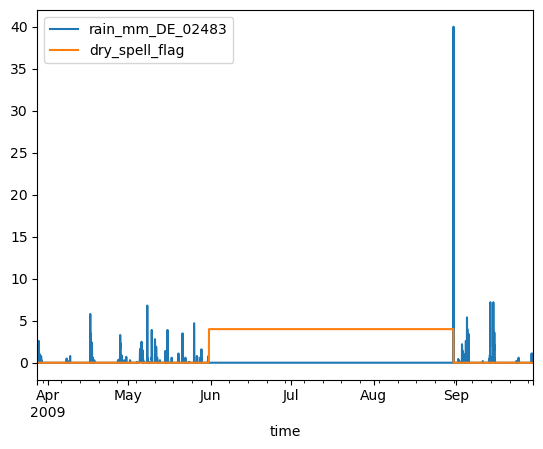

In [30]:
cdd_check.filter((pl.col('time') > pl.date(2009, 3, 28)) & (pl.col('time') < pl.date(2009, 9, 30))).to_pandas().plot(x='time')

##### QC13 - Daily accumulations
(currently need to implement flag 3 for accumulations longer than 1 day & flag 6 for labelling zeros)

In [31]:
daily_accumulations = timeseries_checks.check_daily_accumulations(
    gsdr_data,
    target_gauge_col=TARGET_GAUGE_COL,
    gauge_lat=gsdr_metadata['latitude'],
    gauge_lon=gsdr_metadata['longitude'],
    wet_day_threshold=1.0,
    accumulation_multiplying_factor=2.0,
)
daily_accumulations['daily_accumulation'].value_counts()

daily_accumulation,count
f64,u32
0.0,43392
1.0,432


In [32]:
daily_accumulations = gsdr_data.join(daily_accumulations, on='time')

In [33]:
daily_accumulations.filter(pl.col('daily_accumulation') == 1.0)

time,rain_mm_DE_02483,daily_accumulation
datetime[μs],f64,f64
2006-06-13 17:00:00,0.0,1.0
2006-06-13 18:00:00,0.0,1.0
2006-06-13 19:00:00,0.0,1.0
2006-06-13 20:00:00,0.0,1.0
2006-06-13 21:00:00,0.0,1.0
…,…,…
2010-10-31 20:00:00,0.0,1.0
2010-10-31 21:00:00,0.0,1.0
2010-10-31 22:00:00,0.0,1.0


<Axes: xlabel='time'>

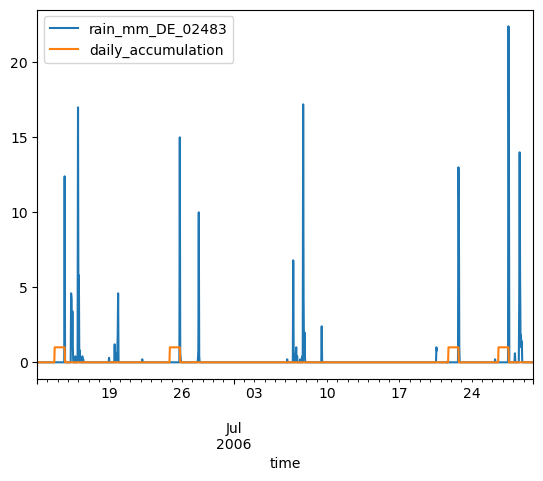

In [34]:
daily_accumulations.filter((pl.col('time') > pl.date(2006, 6, 12)) & (pl.col('time') < pl.date(2006, 7, 30))).to_pandas().plot(x='time')

Editing accumulation period length...

In [35]:
N_HOURS = 96
ACCUMULATION_THRESHOLD = 11.0

da_flags = timeseries_checks.flag_accumulation_periods(gsdr_data, TARGET_GAUGE_COL,
                                                       accumulation_threshold=ACCUMULATION_THRESHOLD,
                                                       accumulation_period_in_hours=N_HOURS)

n_hour_accumulations = gsdr_data.with_columns(n_hour_accumulation=pl.Series(da_flags))
n_hour_accumulations['n_hour_accumulation'].value_counts()


n_hour_accumulation,count
f64,u32
1.0,576
0.0,43248


<Axes: xlabel='time'>

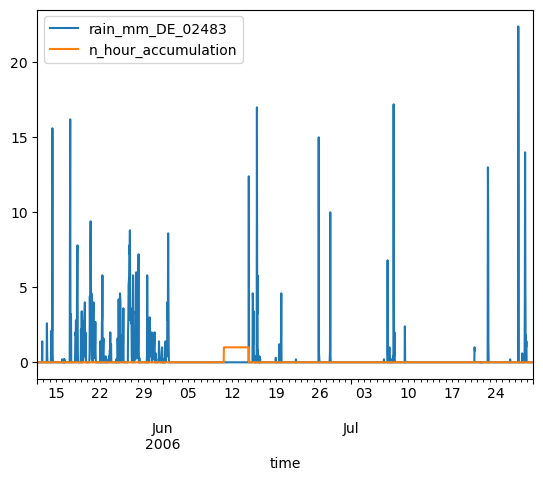

In [36]:
n_hour_accumulations.filter((pl.col('time') > pl.date(2006, 5, 12)) & (pl.col('time') < pl.date(2006, 7, 30))).to_pandas().plot(x='time')

##### QC14

In [37]:
monthly_accumulations = timeseries_checks.check_monthly_accumulations(
    gsdr_data,
    TARGET_GAUGE_COL,
    gauge_lat=gsdr_metadata['latitude'],
    gauge_lon=gsdr_metadata['longitude'],
)
monthly_accumulations['monthly_accumulation'].value_counts()

monthly_accumulation,count
i32,u32
2,22
0,43802


In [38]:
monthly_accumulations = gsdr_data.join(monthly_accumulations, on='time')

In [39]:
monthly_accumulations.filter(pl.col("monthly_accumulation") == 2)

time,rain_mm_DE_02483,monthly_accumulation
datetime[μs],f64,i32
2006-06-14 16:00:00,12.4,2
2006-06-25 19:00:00,15.0,2
2006-07-07 17:00:00,17.2,2
2006-07-22 17:00:00,13.0,2
2006-07-27 13:00:00,22.4,2
…,…,…
2010-08-10 23:00:00,50.0,2
2010-08-11 23:00:00,40.0,2
2010-08-12 23:00:00,40.0,2


##### QC15 - Streaks

- Flag 1: 2 or more repeated above extreme rain  
- Flag 3: streaks of 12 or more greater than data resolution  
- Flag 4: streaks of 24 or more greater than 0  
- Flag 5: Periods of 0 as multiples of 24  

In [41]:
streaks = timeseries_checks.check_streaks(
    gsdr_data,
    target_gauge_col=TARGET_GAUGE_COL,
    gauge_lat=gsdr_metadata["latitude"],
    gauge_lon=gsdr_metadata["longitude"],
    smallest_measurable_rainfall_amount=gsdr_metadata["resolution"],
)

streaks['streak_flag1'].value_counts()

streak_flag1,count
i32,u32
1,33
0,43791


In [42]:
streaks = gsdr_data.join(streaks, on='time')

In [43]:
streaks.filter(pl.col("streak_flag1") == 1)

time,rain_mm_DE_02483,streak_flag1,streak_flag3,streak_flag4,streak_flag5
datetime[μs],f64,i32,i32,i32,i32
2006-12-24 01:00:00,450.0,1,3,0,0
2006-12-24 02:00:00,450.0,1,3,0,0
2006-12-24 03:00:00,450.0,1,3,0,0
2006-12-24 04:00:00,450.0,1,3,0,0
2006-12-24 05:00:00,450.0,1,3,0,0
…,…,…,…,…,…
2008-05-30 19:00:00,50.0,1,0,0,0
2008-05-30 20:00:00,50.0,1,0,0,0
2008-05-30 21:00:00,50.0,1,0,0,0


<Axes: xlabel='time'>

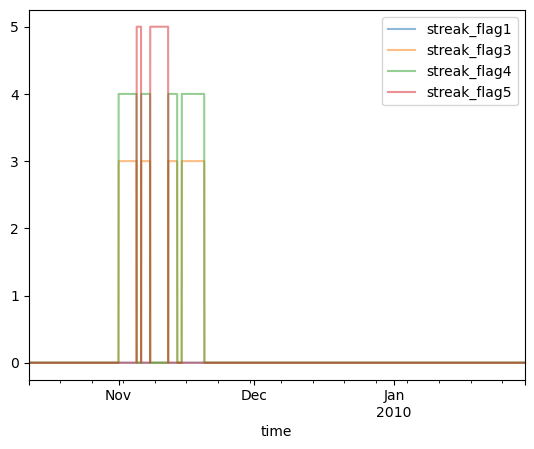

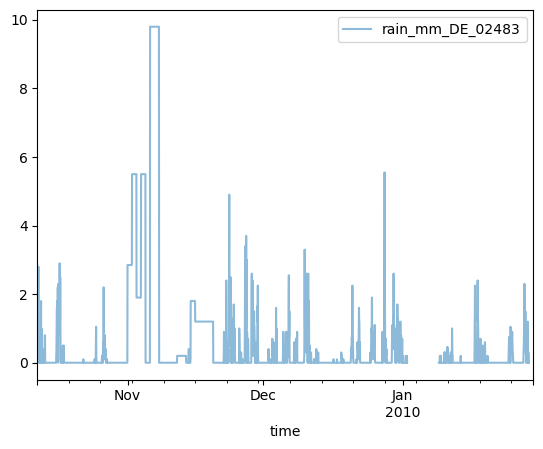

In [44]:
streaks.filter((pl.col('time') > pl.date(2009, 10, 12)) & (pl.col('time') < pl.date(2010, 1, 30))).to_pandas()[['time', 'streak_flag1', 'streak_flag3', 'streak_flag4', 'streak_flag5']].plot(x='time', alpha=.5)
streaks.filter((pl.col('time') > pl.date(2009, 10, 12)) & (pl.col('time') < pl.date(2010, 1, 30))).to_pandas()[['time', TARGET_GAUGE_COL]].plot(x='time', alpha=.5)

# 2.4 Neighbourhood checks
[Back to Index](#index)  
QC16-QC25 (neighbouring gauge checks)

<img src="images/neighbourhood_example.png" alt="neighbourhood" width="300"/>

**Description:** For detecting abnormalities based on measurements in neighbouring gauges.


In [ ]:
gdsr_network_data.head()

time,rain_mm_DE_02483,rain_mm_DE_02718,rain_mm_DE_04488,rain_mm_DE_00310,rain_mm_DE_00390,rain_mm_DE_03215,rain_mm_DE_06303,rain_mm_DE_01300
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64
2006-01-01 00:00:00,0.9,0.1,null,0.0,0.0,null,0.0,0.1
2006-01-01 01:00:00,0.3,0.6,null,0.2,0.2,null,0.2,0.0
2006-01-01 02:00:00,0.3,0.1,null,0.0,0.0,null,0.0,0.0
2006-01-01 03:00:00,0.0,0.0,null,0.0,0.0,null,0.0,0.0
2006-01-01 04:00:00,0.0,0.0,null,0.1,0.0,null,0.0,0.0


##### QC16 Daily neighbours (wet)
Identifies suspiciously large values by comparison to to neighbouring data

In [47]:
gdsr_network_data_onenans = gdsr_network_data.with_columns(
    rain_mm_test=300
)

In [48]:
gdsr_network_data_onenans

time,rain_mm_DE_02483,rain_mm_DE_02718,rain_mm_DE_04488,rain_mm_DE_00310,rain_mm_DE_06303,rain_mm_DE_01300,rain_mm_DE_03215,rain_mm_DE_00390,rain_mm_test
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,i32
2006-01-01 00:00:00,0.9,0.1,null,0.0,0.0,0.1,null,0.0,300
2006-01-01 01:00:00,0.3,0.6,null,0.2,0.2,0.0,null,0.2,300
2006-01-01 02:00:00,0.3,0.1,null,0.0,0.0,0.0,null,0.0,300
2006-01-01 03:00:00,0.0,0.0,null,0.0,0.0,0.0,null,0.0,300
2006-01-01 04:00:00,0.0,0.0,null,0.1,0.0,0.0,null,0.0,300
…,…,…,…,…,…,…,…,…,…
2010-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300
2010-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300
2010-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300


In [49]:
wet_daily_check = neighbourhood_checks.check_wet_neighbours(
    gdsr_network_data_onenans,
    target_gauge_col=TARGET_GAUGE_COL,
    list_of_nearest_stations=gdsr_network_data_onenans.columns[1:],
    time_res='hourly',
    wet_threshold=1.0,
    min_n_neighbours=5,
    n_neighbours_ignored=0,
)
wet_daily_check['wet_spell_flag_hourly'].value_counts()

wet_spell_flag_hourly,count
f64,u32
2.0,24
null,1608
0.0,42168
3.0,24


In [50]:
wet_daily_check = gdsr_network_data.join(wet_daily_check, on='time')

In [51]:
wet_daily_check.filter(pl.col("wet_spell_flag_hourly") == 2.0)

time,rain_mm_DE_02483,rain_mm_DE_02718,rain_mm_DE_04488,rain_mm_DE_00310,rain_mm_DE_06303,rain_mm_DE_01300,rain_mm_DE_03215,rain_mm_DE_00390,wet_spell_flag_hourly
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64
2007-04-23 00:00:00,999.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0
2007-04-23 01:00:00,999.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0
2007-04-23 02:00:00,999.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0
2007-04-23 03:00:00,999.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0
2007-04-23 04:00:00,999.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0
…,…,…,…,…,…,…,…,…,…
2007-04-23 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0
2007-04-23 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0
2007-04-23 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,2.0


Changing number of ignored neighbours...

In [52]:
WET_THRESHOLD = 0.1
N_NEIGHBOURS_IGNORED = 6

wet_daily_check = neighbourhood_checks.check_wet_neighbours(
    gdsr_network_data,
    target_gauge_col=TARGET_GAUGE_COL,
    list_of_nearest_stations=gdsr_network_data.columns[1:],
    time_res='hourly',
    wet_threshold=WET_THRESHOLD,
    min_n_neighbours=5,
    n_neighbours_ignored=N_NEIGHBOURS_IGNORED,
)
wet_daily_check['wet_spell_flag_hourly'].value_counts()

wet_spell_flag_hourly,count
f64,u32
2.0,24
3.0,48
0.0,40872
null,2880


In [53]:
wet_daily_check = gdsr_network_data.join(wet_daily_check, on='time')

In [54]:
wet_daily_check.filter(pl.col("wet_spell_flag_hourly") == 3.0)

time,rain_mm_DE_02483,rain_mm_DE_02718,rain_mm_DE_04488,rain_mm_DE_00310,rain_mm_DE_06303,rain_mm_DE_01300,rain_mm_DE_03215,rain_mm_DE_00390,wet_spell_flag_hourly
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64
2006-12-24 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0
2006-12-24 01:00:00,450.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0
2006-12-24 02:00:00,450.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0
2006-12-24 03:00:00,450.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0
2006-12-24 04:00:00,450.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0
…,…,…,…,…,…,…,…,…,…
2007-04-23 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0
2007-04-23 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0
2007-04-23 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,3.0


# 3. Running QC frameworks
[Back to Index](#index)  
Like intense-qc

## 3.1 Running multiple QC on a single target gauge

In [55]:
TARGET_GAUGE_COL = 'rain_mm_DE_00310'

In [58]:
target_gauge_lat = gsdr_metadata['latitude']
target_gauge_lon = gsdr_metadata['longitude']

print(target_gauge_lat, target_gauge_lon)

51.1803 8.4891


In [59]:
qc_to_run = [
            "QC1", "QC2", "QC3", "QC4", "QC5", "QC6", "QC7", # gauge checks
            "QC8", "QC9", "QC10", "QC11", # comparison checks
            "QC12", "QC13", "QC14", "QC15", # time series checks
            "QC17", "QC19", "QC21", "QC22", "QC23", # neighbourhood checks (for hourly data)
            ]

qc_kwargs = {
    "QC1": {"quantile": 5},
    "QC2": {"k": 3},
    "QC3": {"time_granularity": "hour"},
    "QC4": {"time_granularity": "weekday"},
    "QC5": {"no_data_threshold" : 2}, # days
    "QC6": {"p_threshold": 0.05},
    "QC7": {"expected_min_val": 0.1},
    "QC13": {"accumulation_multiplying_factor": 2.0},
    "QC14": {"accumulation_multiplying_factor": 2.0},
    # Shared defaults applied to all
    "shared": {
        "target_gauge_col": TARGET_GAUGE_COL,
        "nearest_neighbour": "rain_mm_DE_02483",
        "gauge_lat": target_gauge_lat,
        "gauge_lon": target_gauge_lon,
        "time_res": "hourly",
        "smallest_measurable_rainfall_amount": float(gsdr_metadata['resolution']),
        "wet_threshold": 1.0,
        "list_of_nearest_stations": gdsr_network_data.columns[2:],
        "min_n_neighbours": 5,
        "n_neighbours_ignored": 0
    }
}

In [60]:
%%time
results = apply_qc_framework.run_qc_framework(data=gdsr_network_data,
                                              qc_framework='IntenseQC',
                                              qc_methods_to_run=qc_to_run,
                                              qc_kwargs=qc_kwargs)

CPU times: user 5.1 s, sys: 249 ms, total: 5.35 s
Wall time: 5.16 s


In [61]:
results

{'QC1': [],
 'QC2': [],
 'QC3': 0,
 'QC4': 0,
 'QC5': [],
 'QC6': 0,
 'QC7': [],
 'QC8': [0, 0, 0, 0, 0],
 'QC9': [0, 0, 0, 0, 0],
 'QC10': shape: (43_824, 2)
 ┌─────────────────────┬────────────────────┐
 │ time                ┆ world_record_check │
 │ ---                 ┆ ---                │
 │ datetime[μs]        ┆ f64                │
 ╞═════════════════════╪════════════════════╡
 │ 2006-01-01 00:00:00 ┆ 0.0                │
 │ 2006-01-01 01:00:00 ┆ 0.0                │
 │ 2006-01-01 02:00:00 ┆ 0.0                │
 │ 2006-01-01 03:00:00 ┆ 0.0                │
 │ 2006-01-01 04:00:00 ┆ 0.0                │
 │ …                   ┆ …                  │
 │ 2010-12-31 19:00:00 ┆ 0.0                │
 │ 2010-12-31 20:00:00 ┆ 0.0                │
 │ 2010-12-31 21:00:00 ┆ 0.0                │
 │ 2010-12-31 22:00:00 ┆ 0.0                │
 │ 2010-12-31 23:00:00 ┆ 0.0                │
 └─────────────────────┴────────────────────┘,
 'QC11': shape: (43_824, 2)
 ┌─────────────────────┬──────

In [62]:
results['QC12'] 

time,dry_spell_flag
datetime[μs],f64
2006-01-01 00:00:00,0.0
2006-01-01 01:00:00,0.0
2006-01-01 02:00:00,0.0
2006-01-01 03:00:00,0.0
2006-01-01 04:00:00,0.0
…,…
2010-12-31 19:00:00,0.0
2010-12-31 20:00:00,0.0
2010-12-31 21:00:00,0.0


In [63]:
results['QC17']['wet_spell_flag_hourly'].value_counts()

wet_spell_flag_hourly,count
f64,u32
0.0,42960
1.0,72
3.0,24
null,768


In [64]:
results

{'QC1': [],
 'QC2': [],
 'QC3': 0,
 'QC4': 0,
 'QC5': [],
 'QC6': 0,
 'QC7': [],
 'QC8': [0, 0, 0, 0, 0],
 'QC9': [0, 0, 0, 0, 0],
 'QC10': shape: (43_824, 2)
 ┌─────────────────────┬────────────────────┐
 │ time                ┆ world_record_check │
 │ ---                 ┆ ---                │
 │ datetime[μs]        ┆ f64                │
 ╞═════════════════════╪════════════════════╡
 │ 2006-01-01 00:00:00 ┆ 0.0                │
 │ 2006-01-01 01:00:00 ┆ 0.0                │
 │ 2006-01-01 02:00:00 ┆ 0.0                │
 │ 2006-01-01 03:00:00 ┆ 0.0                │
 │ 2006-01-01 04:00:00 ┆ 0.0                │
 │ …                   ┆ …                  │
 │ 2010-12-31 19:00:00 ┆ 0.0                │
 │ 2010-12-31 20:00:00 ┆ 0.0                │
 │ 2010-12-31 21:00:00 ┆ 0.0                │
 │ 2010-12-31 22:00:00 ┆ 0.0                │
 │ 2010-12-31 23:00:00 ┆ 0.0                │
 └─────────────────────┴────────────────────┘,
 'QC11': shape: (43_824, 2)
 ┌─────────────────────┬──────

## 3.2 Running multiple QC checks on a network of gauges